The aim of this notebook is to code the groundwater flow equations on a small 3D grid where each cell contains anisotropic hydraulic conductivity values

Converged after 11 iterations with residual: 7.688999109589645e-05


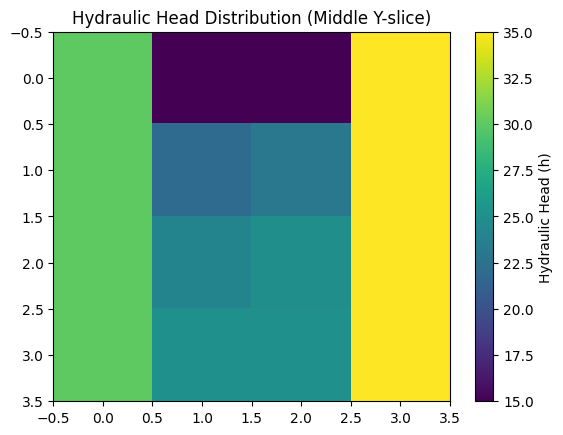

Final hydraulic head distribution:
 [[[30.         15.         15.         35.        ]
  [30.         15.         15.         35.        ]
  [30.         15.         15.         35.        ]
  [30.         15.         15.         35.        ]]

 [[30.         10.         10.         35.        ]
  [30.         19.99997437 20.99998719 35.        ]
  [30.         21.99998719 22.99999359 35.        ]
  [30.         20.         20.         35.        ]]

 [[30.         10.         10.         35.        ]
  [30.         21.99998719 22.99999359 35.        ]
  [30.         23.99999359 24.9999968  35.        ]
  [30.         20.         20.         35.        ]]

 [[30.         25.         25.         35.        ]
  [30.         25.         25.         35.        ]
  [30.         25.         25.         35.        ]
  [30.         25.         25.         35.        ]]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid dimensions (number of nodes in each direction)
Nx, Ny, Nz = 4, 4, 4  # Example, can be adjusted for your case

# Define grid spacing (can vary for each direction)
dx = 1.0  # Grid spacing in x direction
dy = 1.0  # Grid spacing in y direction
dz = 1.0  # Grid spacing in z direction

# Define hydraulic head array (h)
h = np.zeros((Nx, Ny, Nz))

# Boundary conditions (example: Dirichlet boundaries)
# Set boundary hydraulic heads at the boundaries
h[:, 0, :] = 10  # Left boundary in y direction
h[:, -1, :] = 20  # Right boundary in y direction
h[0, :, :] = 15  # Front boundary in x direction
h[-1, :, :] = 25  # Back boundary in x direction
h[:, :, 0] = 30  # Bottom boundary in z direction
h[:, :, -1] = 35  # Top boundary in z direction

# Define the number of iterations
max_iter = 5000
tolerance = 1e-4

# Iterate to solve the equation using finite difference method
for iteration in range(max_iter):
    h_old = h.copy()

    # Update the hydraulic head using finite difference scheme
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            for k in range(1, Nz-1):
                h[i, j, k] = (h[i+1, j, k] + h[i-1, j, k]) * (dy**2) * (dz**2) + \
                              (h[i, j+1, k] + h[i, j-1, k]) * (dx**2) * (dz**2) + \
                              (h[i, j, k+1] + h[i, j, k-1]) * (dx**2) * (dy**2)
                h[i, j, k] /= 2 * (dx**2 * dy**2 + dy**2 * dz**2 + dz**2 * dx**2)

    # Check for convergence (residual error)
    residual = np.max(np.abs(h - h_old))
    if residual < tolerance:
        print(f"Converged after {iteration + 1} iterations with residual: {residual}")
        break

# Plot the hydraulic head distribution in the middle slice of the domain (example)
plt.imshow(h[:, Ny//2, :], cmap='viridis', aspect='auto')
plt.colorbar(label='Hydraulic Head (h)')
plt.title('Hydraulic Head Distribution (Middle Y-slice)')
plt.show()

# Return the final hydraulic head array
print("Final hydraulic head distribution:\n", h)

